<a href="https://colab.research.google.com/github/moh-a-abde/moh-a-abde/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this function will input preprocessed encoded, complete, fully numerica data and send through a SVM

#for more information about SVM:
#SVM for imbalanced data classification:
#https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/
#Support Vector Machines for Machine Learning:
#https://machinelearningmastery.com/support-vector-machines-for-machine-learning/
#A tutorial on support Vector Machines for Pattern Recognition (PDF)
#http://research.microsoft.com/en-us/um/people/cburges/papers/svmtutorial.pdf
#Support Vector Machines from the SCIKIT Learn Documentation
#https://scikit-learn.org/stable/modules/svm.html
#https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [ ]:
#import libraries
import time
import os

import numpy as np
from numpy.random import randn
import pandas as pd

import math
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, multilabel_confusion_matrix
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [ ]:
#read the preprocessed data file
data = pd.read_csv('/content/Sensor_Final_Pre.csv')

#check data dimensions
data.shape

(284557, 12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,6,37495,72,24582,1,1,289,1,60,1,40,2
1,36,6253,73,12722,1,0,275,1,40,0,0,1
2,14,43543,118,2759,2,0,2,0,0,0,0,0
3,13,16336,120,24147,2,6,262,1,112,0,0,0
4,16,45414,128,349,1,10,351,1,52,47,51466,0


In [ ]:
#determine the features (X) and the labels to classify (y)
X = data.drop(['label'], axis = 1).values # X are features
y = data['label'].values                  # Y is the label (what we are classifying)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cuml
from cuml.svm import SVC as cuSVC
import time


# split data into training and remaining (validation + testing)
# first split (80% training, 20% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20)

# split the remaining data into validation and testing
# second split (50% of remaining for validation, 50% for testing)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.50)

# normalize the data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)  # note: use transform, not fit_transform
X_test = sc.transform(X_test)  # note: use transform, not fit_transform

# start train time
startTrainTime = time.time()

# fit GPU-accelerated SVM to the training set
classifier = cuSVC(kernel='rbf', C=10, gamma=0.01)
classifier.fit(X_train, y_train)

# end train time
TrainTime = (time.time() - startTrainTime)

# start test time
startTestTime = time.time()

# test model on validation set
y_val_pred = classifier.predict(X_val)

# end validation time
ValTime = (time.time() - startTestTime)

# start test time for test set
startTestTime = time.time()

# test model on test set
y_test_pred = classifier.predict(X_test)

# end test time
TestTime = (time.time() - startTestTime)

Training time:  7.07601261138916
Validation prediction time:  0.6614322662353516
Test prediction time:  0.300814151763916


In [ ]:
# Calculate metrics
precision = precision_score(y_test, y_test_pred, average='macro')
bal_accuracy = balanced_accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
MeanSq = sqrt(mean_squared_error(y_test, y_test_pred))

# Print training and testing times
print('Train time in seconds: ', TrainTime)
print('Validation prediction time in seconds: ', ValTime)
print('Test time in seconds: ', TestTime)

# Print metrics
print('Balanced Accuracy: ', bal_accuracy * 100.00)
print('Precision: ', precision * 100.00)
print('F1: ', f1 * 100.00)
print('Recall: ', recall * 100.00)
print('RMSE: ', MeanSq)

Train time in seconds:  7.07601261138916
Validation prediction time in seconds:  0.6614322662353516
Test time in seconds:  0.300814151763916
Balanced Accuracy:  99.59787809285527
Precision:  99.65810574374507
F1:  99.62736686005461
Recall:  99.59787809285527
RMSE:  0.08278094494979503


In [ ]:
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9955    0.9973    0.9964     14321
           1     0.9984    0.9909    0.9947      7066
           2     0.9958    0.9997    0.9977      7069

    accuracy                         0.9963     28456
   macro avg     0.9966    0.9960    0.9963     28456
weighted avg     0.9963    0.9963    0.9963     28456



In [ ]:
#see how many unique labels
label = (data['label']).unique()
print(label)

[2 1 0]


142318
71111
71128


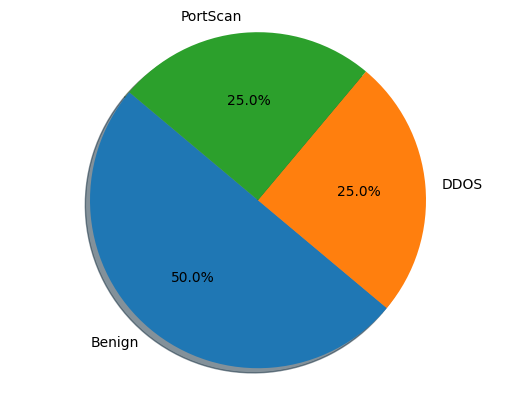

In [ ]:
#data visualization
#plots the distribution of the labels from our data
zero = (data['label'] == 0).sum()
print(zero)
one = (data['label'] == 1).sum()
print(one)
two = (data['label'] == 2).sum()
print(two)

#Data to plot for label column
labels = 'Benign', 'DDOS', 'PortScan'
sizes = [zero, one, two]

# Plot
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()